In [ ]:
!pip install torch torchvision pillow transformers datasets
!pip install gdown saliency numpy pillow matplotlib torch torchvision tensorflow huggingface_hub shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

from IPython.display import  display



In [ ]:
import torch
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import cv2


In [ ]:
from datasets import load_dataset

ds = load_dataset("MMMU/MMMU_Pro", "vision")

README.md:   0%|          | 0.00/8.79k [00:00<?, ?B/s]

test-00000-of-00004.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

test-00001-of-00004.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

test-00002-of-00004.parquet:   0%|          | 0.00/309M [00:00<?, ?B/s]

test-00003-of-00004.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/1730 [00:00<?, ? examples/s]

In [ ]:
print(ds)

DatasetDict({
    test: Dataset({
        features: ['id', 'image', 'options', 'answer', 'subject'],
        num_rows: 1730
    })
})


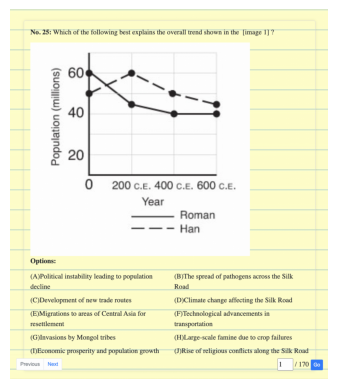

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Access the image
image = ds["test"][0]["image"]

# Display the image
plt.imshow(image)
plt.axis("off")  # Remove axes
plt.show()


In [ ]:
import torch
from PIL import Image
from transformers import AutoProcessor, Kosmos2ForConditionalGeneration

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the Kosmos-2 model and processor, move the model to the GPU
model_kosmos = Kosmos2ForConditionalGeneration.from_pretrained("microsoft/kosmos-2-patch14-224").to(device)
# model_kosmos = Kosmos2ForConditionalGeneration.from_pretrained("microsoft/kosmos-2-patch14-224").to(device)
processor_kosmos = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Using device: cuda


config.json:   0%|          | 0.00/4.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.66G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/534 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/191k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.70M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

In [ ]:

def get_caption_and_entities_kosmos_2(image_path):
    # Load the image
    image = Image.open(image_path)

    # Define the prompt
    prompt = "<grounding> An image of"

    # Process the input for the model
    inputs = processor_kosmos(text=prompt, images=image, return_tensors="pt").to(device)

    # Move tensors to GPU if available
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}


    # Generate the output
    generated_ids = model_kosmos.generate(
        pixel_values=inputs["pixel_values"],
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        image_embeds=None,
        image_embeds_position_mask=inputs["image_embeds_position_mask"],
        use_cache=True,
        max_new_tokens=64,
    )

    # Decode the output
    generated_text = processor_kosmos.batch_decode(generated_ids, skip_special_tokens=True)[0]
    processed_text = processor_kosmos.post_process_generation(generated_text, cleanup_and_extract=False)

    # Extract caption and entities
    caption, entities = processor_kosmos.post_process_generation(generated_text)

    return caption, entities


In [ ]:
from PIL import Image, ImageDraw

def apply_bbox_mask(image_path, entities):
    """
    Applies a filter mask to an image, keeping only the pixels within the bounding boxes and blackening the rest.

    Args:
        image_path (str): Path to the input image.
        entities (list): List of tuples containing object descriptions and bounding box information.
                         Each tuple should be in the format:
                         (description, text_range, [bounding_box_list]),
                         where bounding_box_list contains relative coordinates (x_min, y_min, x_max, y_max).

    Returns:
        Image: Processed image with pixels outside the bounding boxes blackened.
    """
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Create a mask with the same size as the image
    mask = Image.new("L", image.size, 0)  # "L" mode for grayscale

    # Draw the bounding boxes on the mask
    draw = ImageDraw.Draw(mask)
    for _, _, bboxes in entities:
        for bbox in bboxes:
            # Convert bbox relative coordinates to pixel coordinates
            x_min = int(bbox[0] * image.width)
            y_min = int(bbox[1] * image.height)
            x_max = int(bbox[2] * image.width)
            y_max = int(bbox[3] * image.height)
            # Draw a white rectangle for the bounding box
            draw.rectangle([x_min, y_min, x_max, y_max], fill=255)

    # Apply the mask to the image
    filtered_image = Image.new("RGB", image.size)
    filtered_image.paste(image, mask=mask)

    return filtered_image



In [ ]:
# import shutil
# import os

# # Specify the directory to remove
# directory = "/content/Depth-Anything-V2"

# # Check if the directory exists before attempting to remove it
# if os.path.exists(directory):
#     shutil.rmtree(directory)
#     print(f"Directory '{directory}' has been removed successfully.")
# else:
#     print(f"Directory '{directory}' does not exist.")


Directory '/content/Depth-Anything-V2' has been removed successfully.


# Depth anything

In [ ]:
!git lfs install
!git clone https://huggingface.co/spaces/depth-anything/Depth-Anything-V2

Updated git hooks.
Git LFS initialized.
Cloning into 'Depth-Anything-V2'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 154 (delta 46), reused 0 (delta 0), pack-reused 4 (from 1)
Receiving objects: 100% (154/154), 7.75 MiB | 17.11 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
# !GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/spaces/depth-anything/Depth-Anything-V2

In [ ]:
!pip install -r /content/Depth-Anything-V2/requirements.txt
!pip install spaces

In [ ]:
import os

# Change to the desired directory
os.chdir("/content/Depth-Anything-V2")

# Verify the current directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")


Current directory: /content/Depth-Anything-V2


## Now

In [ ]:
import gradio as gr
import cv2
import matplotlib
import numpy as np
import os
from PIL import Image
import spaces
import torch
import tempfile
from gradio_imageslider import ImageSlider
from huggingface_hub import hf_hub_download

from depth_anything_v2.dpt import DepthAnythingV2

import matplotlib


css = """
#img-display-container {
    max-height: 100vh;
}
#img-display-input {
    max-height: 80vh;
}
#img-display-output {
    max-height: 80vh;
}
#download {
    height: 62px;
}
"""
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}
encoder2name = {
    'vits': 'Small',
    'vitb': 'Base',
    'vitl': 'Large',
    'vitg': 'Giant', # we are undergoing company review procedures to release our giant model checkpoint
}
encoder = 'vitl'
model_name = encoder2name[encoder]
model = DepthAnythingV2(**model_configs[encoder])
filepath = hf_hub_download(repo_id=f"depth-anything/Depth-Anything-V2-{model_name}", filename=f"depth_anything_v2_{encoder}.pth", repo_type="model")
state_dict = torch.load(filepath, map_location="cpu",weights_only=True)
model.load_state_dict(state_dict)
model = model.to(DEVICE).eval()
cmap = matplotlib.colormaps.get_cmap('Spectral_r')


title = "# Depth Anything V2"
description = """Official demo for **Depth Anything V2**.
Please refer to our [paper](https://arxiv.org/abs/2406.09414), [project page](https://depth-anything-v2.github.io), and [github](https://github.com/DepthAnything/Depth-Anything-V2) for more details."""

@spaces.GPU
def predict_depth(image):
    return model.infer_image(image)



def on_submit(image):
    original_image = image.copy()

    h, w = image.shape[:2]

    depth = predict_depth(image[:, :, ::-1])

    raw_depth = Image.fromarray(depth.astype('uint16'))
    tmp_raw_depth = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
    raw_depth.save(tmp_raw_depth.name)

    depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0
    depth = depth.astype(np.uint8)
    colored_depth = (cmap(depth)[:, :, :3] * 255).astype(np.uint8)

    gray_depth = Image.fromarray(depth)
    tmp_gray_depth = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
    gray_depth.save(tmp_gray_depth.name)

    return [(original_image, colored_depth), tmp_gray_depth.name, tmp_raw_depth.name]



In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("/content/image.jpg")

def make_depth_context_img(image):
    # Convert to a NumPy array
    image_array = np.array(image)

    print("Image loaded as NumPy array:")
    print(image_array.shape)

    all_outputs = on_submit(image_array)

    # Assuming image_array is the original image array and all_outputs[0][1] contains the intensity values
    intensity_image = all_outputs[0][1]  # Image from which we calculate intensity percentiles

    # Get image dimensions
    height, width, channels = image_array.shape

    # Flatten the intensity image to get a list of all pixel intensities
    flattened_intensity_image = intensity_image.reshape(-1, 3)

    # Calculate intensity values for each pixel (using the average of RGB channels)
    intensities = np.mean(flattened_intensity_image, axis=1)

    # Calculate the percentiles
    top30_threshold = np.percentile(intensities, 70)  # 70th percentile for top 30%
    bottom30_threshold = np.percentile(intensities, 30)  # 30th percentile for bottom 30%
    mid40_lower_threshold = np.percentile(intensities, 30)  # 30th percentile
    mid40_upper_threshold = np.percentile(intensities, 70)  # 70th percentile

    # Create masks based on the intensity thresholds
    top30_mask_flat = intensities > top30_threshold
    bottom30_mask_flat = intensities < bottom30_threshold
    mid40_mask_flat = (intensities >= mid40_lower_threshold) & (intensities <= mid40_upper_threshold)

    # Reshape masks to match the original image shape (height, width, channels)
    top30_mask = top30_mask_flat.reshape(height, width, 1)
    bottom30_mask = bottom30_mask_flat.reshape(height, width, 1)
    mid40_mask = mid40_mask_flat.reshape(height, width, 1)

    # Apply masks to the image_array (preserve the regions and set others to black)
    top30_image = np.where(top30_mask, image_array, 0)
    bottom30_image = np.where(bottom30_mask, image_array, 0)
    mid40_image = np.where(mid40_mask, image_array, 0)


    return [top30_image, bottom30_image, mid40_image]



Image loaded as NumPy array:
(275, 640, 3)


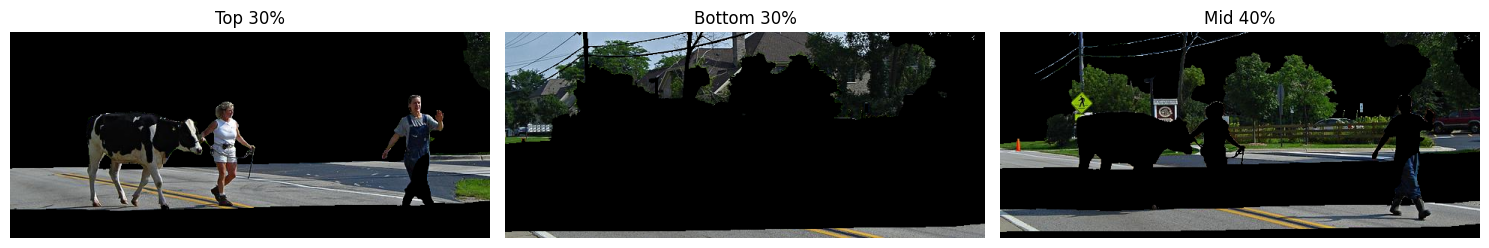

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

images = make_depth_context_img(image)

# Plot the images
plt.figure(figsize=(15, 5))
titles = ['Top 30%', 'Bottom 30%', 'Mid 40%']
# images = [top30_image, bottom30_image, mid40_image]

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from PIL import Image

def get_caption_and_entities_kosmos_2(image_array):
    # Convert the numpy array image to a PIL Image
    image = Image.fromarray(image_array.astype('uint8'))

    # Define the prompt
    prompt = "<grounding> An image of"

    # Process the input for the model
    inputs = processor_kosmos(text=prompt, images=image, return_tensors="pt").to(device)

    # Move tensors to GPU if available
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    # Generate the output
    generated_ids = model_kosmos.generate(
        pixel_values=inputs["pixel_values"],
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        image_embeds=None,
        image_embeds_position_mask=inputs["image_embeds_position_mask"],
        use_cache=True,
        max_new_tokens=64,
    )

    # Decode the output
    generated_text = processor_kosmos.batch_decode(generated_ids, skip_special_tokens=True)[0]
    processed_text = processor_kosmos.post_process_generation(generated_text, cleanup_and_extract=False)

    # Extract caption and entities
    caption, entities = processor_kosmos.post_process_generation(generated_text)

    return caption, entities


In [ ]:
location = ["Closest","Mid Range","Farthest"]

In [ ]:
for i in range(3):
    image = images[i]
    entities = get_caption_and_entities_kosmos_2(image)

    print(f"{location[i]}: {entities[0]}\n----")


Closest: An image of a woman and a man walking a cow down a street.
----
Mid Range: An image of a fence and houses in the background
----
Farthest: An image of a cow and two people crossing a street
----


## Whole code

Image loaded as NumPy array:
(275, 640, 3)


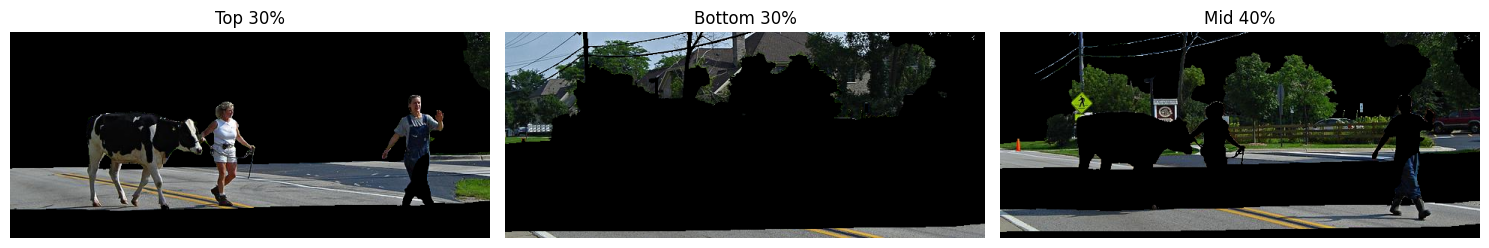

Closest: An image of a woman and a man walking a cow down a street.
----
Mid Range: An image of a fence and houses in the background
----
Farthest: An image of a cow and two people crossing a street
----


In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("/content/image.jpg")

def make_depth_context_img(image):
    # Convert to a NumPy array
    image_array = np.array(image)

    print("Image loaded as NumPy array:")
    print(image_array.shape)

    all_outputs = on_submit(image_array)

    # Assuming image_array is the original image array and all_outputs[0][1] contains the intensity values
    intensity_image = all_outputs[0][1]  # Image from which we calculate intensity percentiles

    # Get image dimensions
    height, width, channels = image_array.shape

    # Flatten the intensity image to get a list of all pixel intensities
    flattened_intensity_image = intensity_image.reshape(-1, 3)

    # Calculate intensity values for each pixel (using the average of RGB channels)
    intensities = np.mean(flattened_intensity_image, axis=1)

    # Calculate the percentiles
    top30_threshold = np.percentile(intensities, 70)  # 70th percentile for top 30%
    bottom30_threshold = np.percentile(intensities, 30)  # 30th percentile for bottom 30%
    mid40_lower_threshold = np.percentile(intensities, 30)  # 30th percentile
    mid40_upper_threshold = np.percentile(intensities, 70)  # 70th percentile

    # Create masks based on the intensity thresholds
    top30_mask_flat = intensities > top30_threshold
    bottom30_mask_flat = intensities < bottom30_threshold
    mid40_mask_flat = (intensities >= mid40_lower_threshold) & (intensities <= mid40_upper_threshold)

    # Reshape masks to match the original image shape (height, width, channels)
    top30_mask = top30_mask_flat.reshape(height, width, 1)
    bottom30_mask = bottom30_mask_flat.reshape(height, width, 1)
    mid40_mask = mid40_mask_flat.reshape(height, width, 1)

    # Apply masks to the image_array (preserve the regions and set others to black)
    top30_image = np.where(top30_mask, image_array, 0)
    bottom30_image = np.where(bottom30_mask, image_array, 0)
    mid40_image = np.where(mid40_mask, image_array, 0)


    return [top30_image, bottom30_image, mid40_image]



import numpy as np
import matplotlib.pyplot as plt

images = make_depth_context_img(image)

# Plot the images
plt.figure(figsize=(15, 5))
titles = ['Top 30%', 'Bottom 30%', 'Mid 40%']
# images = [top30_image, bottom30_image, mid40_image]


for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


import numpy as np
from PIL import Image

def get_caption_and_entities_kosmos_2(image_array):
    # Convert the numpy array image to a PIL Image
    image = Image.fromarray(image_array.astype('uint8'))

    # Define the prompt
    prompt = "<grounding> An image of"

    # Process the input for the model
    inputs = processor_kosmos(text=prompt, images=image, return_tensors="pt").to(device)

    # Move tensors to GPU if available
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    # Generate the output
    generated_ids = model_kosmos.generate(
        pixel_values=inputs["pixel_values"],
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        image_embeds=None,
        image_embeds_position_mask=inputs["image_embeds_position_mask"],
        use_cache=True,
        max_new_tokens=64,
    )

    # Decode the output
    generated_text = processor_kosmos.batch_decode(generated_ids, skip_special_tokens=True)[0]
    processed_text = processor_kosmos.post_process_generation(generated_text, cleanup_and_extract=False)

    # Extract caption and entities
    caption, entities = processor_kosmos.post_process_generation(generated_text)

    return caption, entities



location = ["Closest","Mid Range","Farthest"]

for i in range(3):
    image = images[i]
    entities = get_caption_and_entities_kosmos_2(image)

    print(f"{location[i]}: {entities[0]}\n----")
